<a href="https://colab.research.google.com/github/Luisparf/AMMCI-II/blob/main/LUIS_P_A_AFONSO_mlp_bloco4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score # Biblioteca para separação de amostras para treino e teste, curva de aprendizagem do treinamento e para processar a validação cruzada
from sklearn.neural_network import MLPClassifier # Biblioteca para utilização do classificador MLP
from sklearn.preprocessing import MinMaxScaler, StandardScaler # Biblioteca utilizada para normalização dos dados
from sklearn.model_selection import learning_curve # Biblioteca para avaliar um modelo por meio da curva de aprendizagem baseado no tamanho o conjunto de dados
from sklearn.pipeline import Pipeline # Biblioteca para organização de ações em sequência
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, balanced_accuracy_score, precision_score, confusion_matrix, classification_report # Biblioteca para avaliação de métricas da execução do classificador
from sklearn import metrics
import joblib
import seaborn as sns # é uma biblioteca baseada no Matplotlib, que oferece uma interface de alto nível para criação de gráficos estatísticos
import matplotlib.pyplot as plt # Para visualizacao dos dados e do erro
import numpy as np # Biblioteca de manipulação de arrays Numpy
from numpy import mean, std
import pandas as pd # Biblioteca para manipulação de dados, aqui especificamente para importação e manipulação inicial do dataset
from google.colab import drive # Biblioteca para interação do colab com o drive
drive.mount('/content/drive') # Montando o Google Drive na mesma conta do Google Colab
BASE_PATH = "/content/drive/MyDrive/Colab Notebooks/POS/REDES NEURAIS/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Caminho do dataset no Google Drive que será carregado em df
df = pd.read_csv(BASE_PATH + "bebidas.csv")

# df

# Separando as features e os labels
X = df.drop(columns=['d1', 'd2', 'd3'])
Y = df[['d1', 'd2', 'd3']]

print(f'{X.shape}')
print(f'{Y.shape}')
print()
print(X.head())
print()
print(Y.head())



(130, 4)
(130, 3)

       x1      x2      x3      x4
0  0.3841  0.2021  0.0000  0.2438
1  0.1765  0.1613  0.3401  0.0843
2  0.3170  0.5786  0.3387  0.4192
3  0.2467  0.0337  0.2699  0.3454
4  0.6102  0.8192  0.4679  0.4762

   d1  d2  d3
0   1   0   0
1   1   0   0
2   0   1   0
3   1   0   0
4   0   1   0


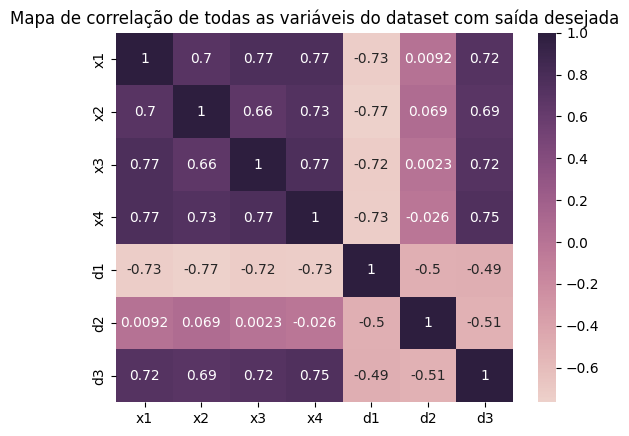

In [ ]:
# Gera um gráfico matricial para apresentar a correção entre as variáveis de entrada do dataset
ax = sns.heatmap(df.corr(numeric_only=True), annot=True, cmap=sns.cubehelix_palette(as_cmap=True))
ax.set_title('Mapa de correlação de todas as variáveis do dataset com saída desejada')
ax=ax

In [ ]:
# Convertendo Y (one-hot) para rótulos de classe (0, 1, 2)
y_labels = np.argmax(Y.values, axis=1)

# Dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y_labels, test_size=0.3, random_state=42)


# Treinamento para 5, 10 e 10 neuronios na camada oculta





In [ ]:
# Treinamento de modelos
hidden_sizes = [5, 10, 15]
fitted_models = {}
losses = {}

best_loss  = float('inf')
best_model = None
best_size  = None

for size in hidden_sizes:
    print(f"Treinando com camada oculta de {size} neurônios...")

    mlp = MLPClassifier(
        hidden_layer_sizes=(size,),
        activation='logistic',
        learning_rate_init=0.001,
        tol=1e-6,
        max_iter=5000,
        random_state=42
    )

    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('mlp', mlp)
    ])

    pipeline.fit(X_train, y_train)
    loss = pipeline.named_steps['mlp'].loss_curve_[-1]

    fitted_models[size] = pipeline
    losses[size] = loss

    if loss < best_loss:
        best_loss = loss
        best_model = pipeline
        best_size = size

    # Avaliação no conjunto de teste
    y_pred = pipeline.predict(X_test)
    print(f"\n=== Camada oculta: {size} neurônios ===")
    print("Acurácia:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, target_names=['Tipo A', 'Tipo B', 'Tipo C']))
    print("=" * 40)

# 3. Salvar o melhor modelo
print(f"\n Melhor modelo: {best_size} neurônios (loss final = {best_loss:.6f})")
joblib.dump(best_model, f'melhor_modelo_{best_size}_neuronios.pkl')

Treinando com camada oculta de 5 neurônios...


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(



=== Camada oculta: 5 neurônios ===
Acurácia: 0.9230769230769231
              precision    recall  f1-score   support

      Tipo A       1.00      0.92      0.96        13
      Tipo B       0.87      0.93      0.90        14
      Tipo C       0.92      0.92      0.92        12

    accuracy                           0.92        39
   macro avg       0.93      0.92      0.92        39
weighted avg       0.93      0.92      0.92        39

Treinando com camada oculta de 10 neurônios...


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(



=== Camada oculta: 10 neurônios ===
Acurácia: 0.9230769230769231
              precision    recall  f1-score   support

      Tipo A       1.00      0.92      0.96        13
      Tipo B       0.87      0.93      0.90        14
      Tipo C       0.92      0.92      0.92        12

    accuracy                           0.92        39
   macro avg       0.93      0.92      0.92        39
weighted avg       0.93      0.92      0.92        39

Treinando com camada oculta de 15 neurônios...

=== Camada oculta: 15 neurônios ===
Acurácia: 0.9230769230769231
              precision    recall  f1-score   support

      Tipo A       1.00      0.92      0.96        13
      Tipo B       0.87      0.93      0.90        14
      Tipo C       0.92      0.92      0.92        12

    accuracy                           0.92        39
   macro avg       0.93      0.92      0.92        39
weighted avg       0.93      0.92      0.92        39


 Melhor modelo: 15 neurônios (loss final = 0.054969)


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(


['melhor_modelo_15_neuronios.pkl']

#  Gráfico das curvas de perda

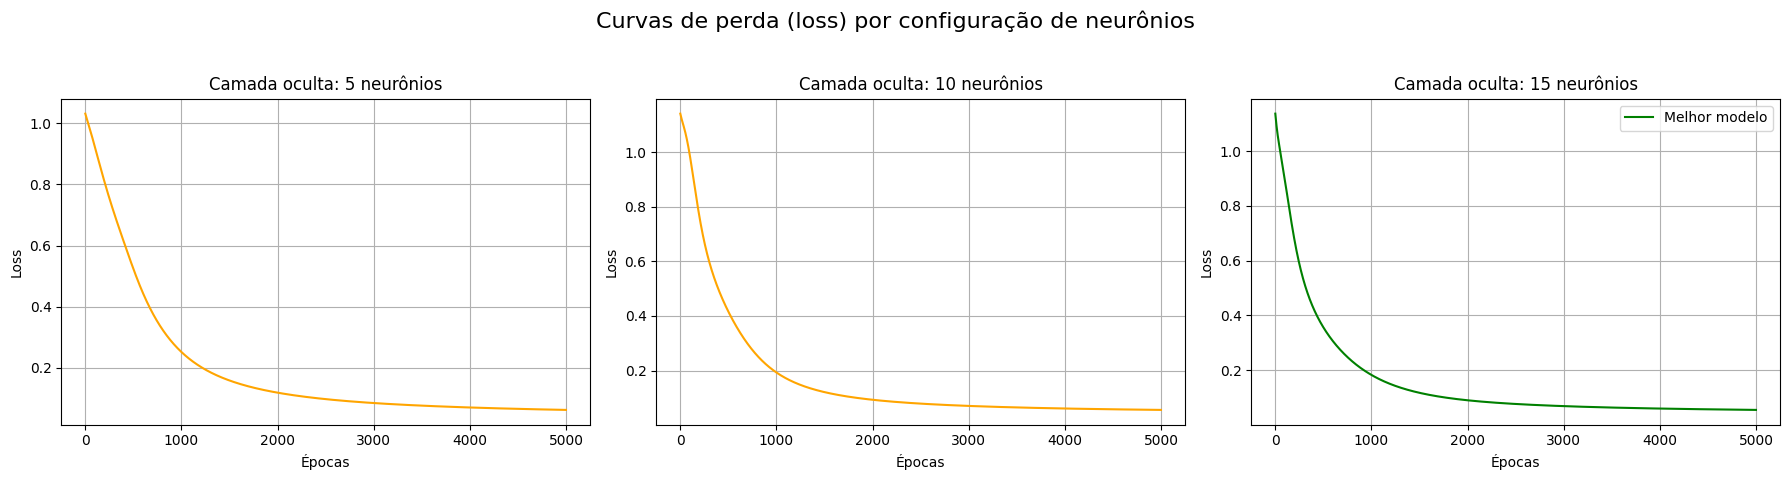

In [ ]:
#  Gráfico das curvas de perda
plt.figure(figsize=(18, 5))
for i, size in enumerate(hidden_sizes):
    loss_curve = fitted_models[size].named_steps['mlp'].loss_curve_
    plt.subplot(1, 3, i + 1)
    plt.plot(loss_curve, label=f'{size} neurônios', color='green' if size == best_size else 'orange')
    plt.title(f'Camada oculta: {size} neurônios')
    plt.xlabel("Épocas")
    plt.ylabel("Loss")
    plt.grid(True)
    if size == best_size:
        plt.legend(['Melhor modelo'])

plt.suptitle('Curvas de perda (loss) por configuração de neurônios', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Usar o melhor modelo no arquivo de testes

In [ ]:
# Usar o melhor modelo no arquivo de testes
print("\n Testando com arquivo 'bebidasTestes.csv'...")
df_test = pd.read_csv(BASE_PATH +'bebidasTestes.csv')
X_new = df_test[['x1', 'x2', 'x3', 'x4']]
Y_new = df_test[['d1', 'd2', 'd3']]
y_new = np.argmax(Y_new.values, axis=1)

# Carregar modelo salvo e prever
modelo_carregado = joblib.load(f'melhor_modelo_{best_size}_neuronios.pkl')
y_pred_novo = modelo_carregado.predict(X_new)

# Avaliação no novo CSV
print("\n Avaliação no arquivo de teste:")
print("Acurácia:", accuracy_score(y_new, y_pred_novo))
print(classification_report(y_new, y_pred_novo, target_names=['Tipo A', 'Tipo B', 'Tipo C']))


 Testando com arquivo 'bebidasTestes.csv'...

 Avaliação no arquivo de teste:
Acurácia: 0.9444444444444444
              precision    recall  f1-score   support

      Tipo A       1.00      1.00      1.00         6
      Tipo B       0.83      1.00      0.91         5
      Tipo C       1.00      0.86      0.92         7

    accuracy                           0.94        18
   macro avg       0.94      0.95      0.94        18
weighted avg       0.95      0.94      0.94        18

